In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import des csv

In [2]:
train_1M_tm=pd.read_csv('../data/train_1M_with_features_v2.csv')

In [3]:
train_1M_tags_imen=pd.read_csv('../data/df_train_with_tagsv2.csv')

# Merge

In [4]:
train_1M_tm.drop(columns=['Unnamed: 0'],inplace=True)
train_1M_tm

,Unnamed: 0.1,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,...,qstats_answered_correctly_knowing_having_not_had_explanation,qstats_task_container_id_knowing_answered_correctly,qstats_timestamp_knowing_answered_correctly,qstats_user_activity_cumcount_knowing_answered_correctly,qstats_prior_question_elapsed_time_knowing_answered_correctly,qstats_task_container_id_knowing_answered_uncorrectly,qstats_timestamp_knowing_answered_uncorrectly,qstats_user_activity_cumcount_knowing_answered_uncorrectly,qstats_prior_question_elapsed_time_knowing_answered_uncorrectly,user_personalized_qstat_knowing_had_explanation_or_not
0,0,90286654,0,1917429896,7900,0,0,1,NaN,0,...,0.8364,25.47,inf,32.60,20780.0,37.10,inf,54.10,23140.0,0.8364
1,1,90286655,26511,1917429896,7876,0,1,0,21000.0,0,...,0.3770,81.94,inf,107.44,21870.0,34.00,inf,44.25,22600.0,0.3770
2,2,90286656,55312,1917429896,175,0,2,0,21000.0,0,...,0.3513,82.10,inf,107.06,23550.0,55.03,inf,71.70,23180.0,0.3513
3,3,90286657,102436,1917429896,1278,0,3,0,23000.0,0,...,0.6450,56.22,inf,66.70,23360.0,11.08,inf,12.72,23140.0,0.6450
4,4,90286658,188454,1917429896,2063,0,4,0,45000.0,0,...,0.1642,105.00,inf,150.50,18350.0,55.20,inf,77.25,18990.0,0.1642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987264,987264,47484293,1619704,1003849974,6909,0,14,1,17000.0,0,...,0.5930,190.10,inf,271.20,28030.0,151.40,inf,220.10,26110.0,0.5930
987265,987265,47484294,1906094,1003849974,7217,0,15,1,68500.0,0,...,0.4854,86.50,inf,128.80,34800.0,40.47,inf,64.94,31120.0,0.4854
987266,987266,47484295,1906094,1003849974,7216,0,15,1,68500.0,0,...,0.4270,85.25,inf,129.80,34270.0,46.72,inf,71.50,31950.0,0.4270
987267,987267,47484296,1906094,1003849974,7219,0,15,1,68500.0,0,...,0.2842,75.60,inf,110.80,35200.0,58.84,inf,91.70,32060.0,0.2842


In [5]:
train_1M_tags_imen.drop(columns=['user_id'],inplace=True)
train_1M_tags_imen

,row_id,tag_q_l,part_q_l,section,cumcount_already_seen_tag_q_l,already_seen_tag_lecture,already_seen_part
0,90286654,93.0,1.0,0,0,0,0
1,90286655,94.0,1.0,0,0,0,1
2,90286656,9.0,1.0,0,0,0,1
3,90286657,140.0,2.0,0,0,0,0
4,90286658,136.0,3.0,0,0,0,0
...,...,...,...,...,...,...,...
987264,47484293,91.0,6.0,1,0,0,1
987265,47484294,118.0,7.0,1,0,0,0
987266,47484295,97.0,7.0,1,0,0,1
987267,47484296,19.0,7.0,1,0,0,1


In [6]:
train_1M_merged=train_1M_tm.merge(train_1M_tags_imen,on='row_id',how='left')
train_1M_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987269 entries, 0 to 987268
Data columns (total 48 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Unnamed: 0.1                                                     987269 non-null  int64  
 1   row_id                                                           987269 non-null  int64  
 2   timestamp                                                        987269 non-null  int64  
 3   user_id                                                          987269 non-null  int64  
 4   content_id                                                       987269 non-null  int64  
 5   content_type_id                                                  987269 non-null  int64  
 6   task_container_id                                                987269 non-null  int64  
 7   answered_correctly           

# Ajout de features nouveaux

## user_avg_score_cum_on_this_part

(array([ 74916.,      0., 179898.,      0.,  84847.,      0.,  80917.,
             0., 417326.,      0., 102796.,      0.,  46569.]),
 array([1.        , 1.46153846, 1.92307692, 2.38461538, 2.84615385,
        3.30769231, 3.76923077, 4.23076923, 4.69230769, 5.15384615,
        5.61538462, 6.07692308, 6.53846154, 7.        ]),
 <BarContainer object of 13 artists>)

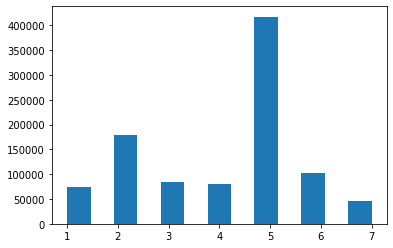

In [7]:
plt.hist(train_1M_merged.part_q_l,bins=13)

In [8]:
train_1M_merged

,Unnamed: 0.1,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,...,qstats_timestamp_knowing_answered_uncorrectly,qstats_user_activity_cumcount_knowing_answered_uncorrectly,qstats_prior_question_elapsed_time_knowing_answered_uncorrectly,user_personalized_qstat_knowing_had_explanation_or_not,tag_q_l,part_q_l,section,cumcount_already_seen_tag_q_l,already_seen_tag_lecture,already_seen_part
0,0,90286654,0,1917429896,7900,0,0,1,NaN,0,...,inf,54.10,23140.0,0.8364,93.0,1.0,0,0,0,0
1,1,90286655,26511,1917429896,7876,0,1,0,21000.0,0,...,inf,44.25,22600.0,0.3770,94.0,1.0,0,0,0,1
2,2,90286656,55312,1917429896,175,0,2,0,21000.0,0,...,inf,71.70,23180.0,0.3513,9.0,1.0,0,0,0,1
3,3,90286657,102436,1917429896,1278,0,3,0,23000.0,0,...,inf,12.72,23140.0,0.6450,140.0,2.0,0,0,0,0
4,4,90286658,188454,1917429896,2063,0,4,0,45000.0,0,...,inf,77.25,18990.0,0.1642,136.0,3.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987264,987264,47484293,1619704,1003849974,6909,0,14,1,17000.0,0,...,inf,220.10,26110.0,0.5930,91.0,6.0,1,0,0,1
987265,987265,47484294,1906094,1003849974,7217,0,15,1,68500.0,0,...,inf,64.94,31120.0,0.4854,118.0,7.0,1,0,0,0
987266,987266,47484295,1906094,1003849974,7216,0,15,1,68500.0,0,...,inf,71.50,31950.0,0.4270,97.0,7.0,1,0,0,1
987267,987267,47484296,1906094,1003849974,7219,0,15,1,68500.0,0,...,inf,91.70,32060.0,0.2842,19.0,7.0,1,0,0,1


In [9]:
def user_part_tuple(row):
    return row.user_id, row.part_q_l

In [10]:
train_1M_merged['user_part_tuples']=train_1M_merged.apply(lambda row: user_part_tuple(row), axis=1)

In [11]:
train_1M_qonly=train_1M_merged.query('content_type_id==0').copy()
train_1M_qonly['user_avg_score_cum_on_this_part']=(train_1M_qonly.groupby('user_part_tuples').cumsum()['answered_correctly']-train_1M_qonly['answered_correctly'])/(train_1M_qonly.groupby('user_part_tuples').cumcount())
train_1M_qonly['user_avg_score_cum_on_this_part'].replace([np.inf,np.nan],0,inplace=True)
train_1M_merged['user_avg_score_cum_on_this_part']=train_1M_qonly['user_avg_score_cum_on_this_part']

## user_correct_answers_cum_on_this_part

In [12]:
train_1M_qonly=train_1M_merged.query('content_type_id==0').copy()
train_1M_qonly['user_correct_answers_cum_on_this_part']=(train_1M_qonly.groupby('user_part_tuples').cumsum()['answered_correctly']-train_1M_qonly['answered_correctly'])
train_1M_qonly['user_correct_answers_cum_on_this_part'].replace([np.inf,np.nan],0,inplace=True)
train_1M_merged['user_correct_answers_cum_on_this_part']=train_1M_qonly['user_correct_answers_cum_on_this_part']

In [13]:
train_1M_merged.drop(columns=['user_part_tuples'],inplace=True)

## part encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,categories='auto')
train_1M_merged[['part1','part2','part3','part4','part5','part6','part7']]=encoder.fit_transform(train_1M_merged[['part_q_l']]).astype('int8')

In [15]:
train_1M_merged[['part_q_l','part1','part2','part3']]

,part_q_l,part1,part2,part3
0,1.0,1,0,0
1,1.0,1,0,0
2,1.0,1,0,0
3,2.0,0,1,0
4,3.0,0,0,1
...,...,...,...,...
987264,6.0,0,0,0
987265,7.0,0,0,0
987266,7.0,0,0,0
987267,7.0,0,0,0


## Ecretage du already_seen_cumcount à 3 car au delà ça stagne

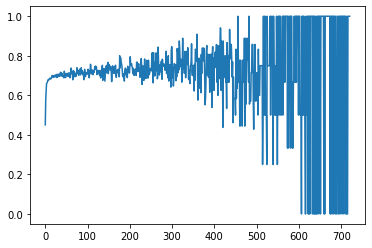

In [16]:
plt.plot(train_1M_merged.groupby('cumcount_already_seen_tag_q_l').mean().answered_correctly)
#plt.xlim(0,20)

In [17]:
train_1M_merged['already_seen_tag_q_l_cumcount_with_trim_at_3']=train_1M_merged.cumcount_already_seen_tag_q_l.apply(lambda x:min(x,3))

# Correlations

In [18]:
train_1M_merged.query('content_type_id==0').corr().answered_correctly.sort_values(ascending=False)

answered_correctly                                                 1.000000
user_personalized_qstat_knowing_had_explanation_or_not             0.393328
qstats_answered_correctly                                          0.380770
qstats_answered_correctly_knowing_having_had_explanation           0.373850
qstats_answered_correctly_knowing_having_not_had_explanation       0.211393
user_avg_score_cum_on_this_part                                    0.189772
user_avg_score_cum                                                 0.181107
qstats_prior_question_had_explanation                              0.109755
prior_question_had_explanation                                     0.100927
already_seen_tag_q_l_cumcount_with_trim_at_3                       0.097745
already_seen_tag_lecture                                           0.086766
already_seen                                                       0.073562
user_activity_cumcount                                             0.073021
task_contain

# Downcast columns

## Partie Tags

In [19]:
train_1M_tags_imen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987269 entries, 0 to 987268
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   row_id                         987269 non-null  int64  
 1   tag_q_l                        987049 non-null  float64
 2   part_q_l                       987269 non-null  float64
 3   section                        987269 non-null  int64  
 4   cumcount_already_seen_tag_q_l  987269 non-null  int64  
 5   already_seen_tag_lecture       987269 non-null  int64  
 6   already_seen_part              987269 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 52.7 MB


In [22]:
train_1M_tags_imen.describe()

,row_id,tag_q_l,part_q_l,section,cumcount_already_seen_tag_q_l,already_seen_tag_lecture,already_seen_part
count,9.872690e+05,987049.000000,987269.000000,987269.000000,987269.000000,987269.000000,987269.000000
mean,5.106176e+07,89.697707,4.094436,0.573999,20.387231,0.797996,0.977719
std,2.848368e+07,53.436650,1.659083,0.494494,46.341897,0.401495,0.147595
min,7.822500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.689085e+07,49.000000,2.000000,0.000000,1.000000,1.000000,1.000000
50%,5.099822e+07,90.000000,5.000000,1.000000,5.000000,1.000000,1.000000
75%,7.502256e+07,137.000000,5.000000,1.000000,17.000000,1.000000,1.000000
max,1.012241e+08,220.000000,7.000000,1.000000,720.000000,1.000000,1.000000


In [42]:
train_1M_tags_imen[np.isnan(train_1M_tags_imen.tag_q_l)]
part2_most_frequent_tag= train_1M_tags_imen.loc[train_1M_tags_imen.part_q_l==2,'tag_q_l'].value_counts().index[0]
part7_most_frequent_tag= train_1M_tags_imen.loc[train_1M_tags_imen.part_q_l==7,'tag_q_l'].value_counts().index[0]

train_1M_tags_imen.loc[(np.isnan(train_1M_tags_imen.tag_q_l)) & (train_1M_tags_imen["part_q_l"] == 2)]=part2_most_frequent_tag
train_1M_tags_imen.loc[(np.isnan(train_1M_tags_imen.tag_q_l)) & (train_1M_tags_imen["part_q_l"] == 7)]=part7_most_frequent_tag
train_1M_tags_imen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987269 entries, 0 to 987268
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   row_id                         987269 non-null  float64
 1   tag_q_l                        987269 non-null  float64
 2   part_q_l                       987269 non-null  float64
 3   section                        987269 non-null  float64
 4   cumcount_already_seen_tag_q_l  987269 non-null  float64
 5   already_seen_tag_lecture       987269 non-null  float64
 6   already_seen_part              987269 non-null  float64
dtypes: float64(7)
memory usage: 52.7 MB


In [43]:
columns_list_to_int8=['already_seen_part','already_seen_tag_lecture','section','part_q_l']
for col in columns_list_to_int8:
    train_1M_merged[col]=train_1M_merged[col].astype('int8')
    
columns_list_to_int16=['cumcount_already_seen_tag_q_l']
for col in columns_list_to_int16:
    train_1M_merged[col]=train_1M_merged[col].astype('int16')

In [44]:
train_1M_tags_imen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987269 entries, 0 to 987268
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   row_id                         987269 non-null  float64
 1   tag_q_l                        987269 non-null  float64
 2   part_q_l                       987269 non-null  float64
 3   section                        987269 non-null  float64
 4   cumcount_already_seen_tag_q_l  987269 non-null  float64
 5   already_seen_tag_lecture       987269 non-null  float64
 6   already_seen_part              987269 non-null  float64
dtypes: float64(7)
memory usage: 52.7 MB


In [45]:
train_1M_merged.dtypes

Unnamed: 0.1                                                         int64
row_id                                                               int64
timestamp                                                            int64
user_id                                                              int64
content_id                                                           int64
content_type_id                                                      int64
task_container_id                                                    int64
answered_correctly                                                   int64
prior_question_elapsed_time                                        float64
prior_question_had_explanation                                       int64
answer0                                                              int64
answer1                                                              int64
answer2                                                              int64
answer3                  

## Tout le reste

In [46]:
train_1M_tm.describe()

,Unnamed: 0.1,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,...,qstats_answered_correctly_knowing_having_not_had_explanation,qstats_task_container_id_knowing_answered_correctly,qstats_timestamp_knowing_answered_correctly,qstats_user_activity_cumcount_knowing_answered_correctly,qstats_prior_question_elapsed_time_knowing_answered_correctly,qstats_task_container_id_knowing_answered_uncorrectly,qstats_timestamp_knowing_answered_uncorrectly,qstats_user_activity_cumcount_knowing_answered_uncorrectly,qstats_prior_question_elapsed_time_knowing_answered_uncorrectly,user_personalized_qstat_knowing_had_explanation_or_not
count,987269.000000,9.872690e+05,9.872690e+05,9.872690e+05,987269.000000,987269.000000,987269.000000,987269.000000,963913.000000,987269.000000,...,839252.000000,967598.000000,967598.0,967598.000000,967594.0,961000.000000,961000.0,961000.000000,960970.0,987269.000000
mean,493634.000000,5.106176e+07,7.555878e+09,1.086222e+09,5222.613857,0.019686,760.903274,0.624081,25320.712894,0.881497,...,0.613189,806.577781,inf,1054.602866,inf,662.081814,inf,870.495154,inf,0.624079
std,285000.155794,2.848368e+07,1.217768e+10,6.040027e+08,3852.192066,0.138918,1130.052798,0.523427,20814.854451,0.323203,...,0.315242,435.513225,NaN,563.052021,NaN,431.019676,NaN,567.989826,NaN,0.295225
min,0.000000,7.822500e+04,0.000000e+00,1.710599e+06,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,-1.000000
25%,246817.000000,2.689085e+07,4.620582e+08,5.740335e+08,2081.000000,0.000000,97.000000,0.000000,16000.000000,1.000000,...,0.400000,516.000000,inf,664.500000,21040.0,396.200000,inf,501.800000,20030.0,0.528000
50%,493634.000000,5.099822e+07,2.305517e+09,1.080359e+09,5030.000000,0.000000,346.000000,1.000000,21000.000000,1.000000,...,0.627400,755.000000,inf,996.000000,23840.0,601.000000,inf,793.000000,23940.0,0.672400
75%,740451.000000,7.502256e+07,9.166741e+09,1.596427e+09,7391.000000,0.000000,908.000000,1.000000,29250.000000,1.000000,...,1.000000,1045.000000,inf,1372.000000,26770.0,852.500000,inf,1133.000000,27550.0,0.792500
max,987268.000000,1.012241e+08,8.077426e+10,2.147379e+09,32736.000000,1.000000,9210.000000,1.000000,300000.000000,1.000000,...,1.000000,8296.000000,inf,10430.000000,inf,9050.000000,inf,11970.000000,inf,1.000000


In [47]:
columns_list_to_float16=train_1M_tm.columns.to_list()[19:]
for col in columns_list_to_float16:
    train_1M_merged[col]=train_1M_merged[col].astype('float16')

In [48]:
columns_list_to_int8=['answer0','answer1','answer2','answer3','already_seen','at_least_one_lesson','content_type_id','answered_correctly','prior_question_had_explanation']
for col in columns_list_to_int8:
    train_1M_merged[col]=train_1M_merged[col].astype('int8')

In [49]:
columns_list_to_int16=['task_container_id','lectures_seen','user_activity_cumcount']
for col in columns_list_to_int16:
    train_1M_merged[col]=train_1M_merged[col].astype('int16')

In [50]:
columns_list_to_int32=['content_id']
for col in columns_list_to_int32:
    train_1M_merged[col]=train_1M_merged[col].astype('int32')

In [51]:
train_1M_merged.dtypes

Unnamed: 0.1                                                         int64
row_id                                                               int64
timestamp                                                            int64
user_id                                                              int64
content_id                                                           int32
content_type_id                                                       int8
task_container_id                                                    int16
answered_correctly                                                    int8
prior_question_elapsed_time                                        float64
prior_question_had_explanation                                        int8
answer0                                                               int8
answer1                                                               int8
answer2                                                               int8
answer3                  

## Nouveaux features

In [52]:
train_1M_merged.describe()

,Unnamed: 0.1,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,...,user_avg_score_cum_on_this_part,user_correct_answers_cum_on_this_part,part1,part2,part3,part4,part5,part6,part7,already_seen_tag_q_l_cumcount_with_trim_at_3
count,987269.000000,9.872690e+05,9.872690e+05,9.872690e+05,987269.000000,987269.000000,987269.000000,987269.000000,963913.000000,987269.000000,...,967834.000000,967834.000000,987269.000000,987269.000000,987269.000000,987269.000000,987269.000000,987269.000000,987269.000000,987269.000000
mean,493634.000000,5.106176e+07,7.555878e+09,1.086222e+09,5222.613857,0.019686,760.903274,0.624081,25320.712894,0.881497,...,0.629244,201.877701,0.075882,0.182218,0.085941,0.081960,0.422707,0.104122,0.047170,2.112552
std,285000.155794,2.848368e+07,1.217768e+10,6.040027e+08,3852.192066,0.138918,1130.052798,0.523427,20814.854451,0.323203,...,0.189240,365.145400,0.264809,0.386024,0.280277,0.274305,0.493990,0.305418,0.212001,1.225470
min,0.000000,7.822500e+04,0.000000e+00,1.710599e+06,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,246817.000000,2.689085e+07,4.620582e+08,5.740335e+08,2081.000000,0.000000,97.000000,0.000000,16000.000000,1.000000,...,0.558140,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,493634.000000,5.099822e+07,2.305517e+09,1.080359e+09,5030.000000,0.000000,346.000000,1.000000,21000.000000,1.000000,...,0.657666,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,740451.000000,7.502256e+07,9.166741e+09,1.596427e+09,7391.000000,0.000000,908.000000,1.000000,29250.000000,1.000000,...,0.739130,217.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
max,987268.000000,1.012241e+08,8.077426e+10,2.147379e+09,32736.000000,1.000000,9210.000000,1.000000,300000.000000,1.000000,...,1.000000,3560.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [53]:
train_1M_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987269 entries, 0 to 987268
Data columns (total 58 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Unnamed: 0.1                                                     987269 non-null  int64  
 1   row_id                                                           987269 non-null  int64  
 2   timestamp                                                        987269 non-null  int64  
 3   user_id                                                          987269 non-null  int64  
 4   content_id                                                       987269 non-null  int32  
 5   content_type_id                                                  987269 non-null  int8   
 6   task_container_id                                                987269 non-null  int16  
 7   answered_correctly           

In [54]:
columns_list_to_float16=['user_avg_score_cum_on_this_part']
for col in columns_list_to_float16:
    train_1M_merged[col]=train_1M_merged[col].astype('float16')

In [55]:
columns_list_to_int16=['user_correct_answers_cum_on_this_part']
for col in columns_list_to_int16:
    train_1M_merged[col]=train_1M_merged[col].astype('float16')

In [56]:
train_1M_tm.columns.to_list()[-1:]

['user_personalized_qstat_knowing_had_explanation_or_not']

In [57]:
columns_list_to_int8=train_1M_merged.columns.to_list()[-8:]
for col in columns_list_to_int8:
    train_1M_merged[col]=train_1M_merged[col].astype('int8')

## Features liés à la question précédente

In [126]:
t1M__q=train_1M_merged.query('content_type_id==0')[['row_id',
                                                   'answered_correctly',
                                                   'user_id',
                                                   'prior_question_had_explanation',
                                                   'part_q_l',
                                                   'tag_q_l']]
t1M__q

,row_id,answered_correctly,user_id,prior_question_had_explanation,part_q_l,tag_q_l
0,90286654,1,1917429896,0,1,93.0
1,90286655,0,1917429896,0,1,94.0
2,90286656,0,1917429896,0,1,9.0
3,90286657,0,1917429896,0,2,140.0
4,90286658,0,1917429896,0,3,136.0
...,...,...,...,...,...,...
987264,47484293,1,1003849974,0,6,91.0
987265,47484294,1,1003849974,0,7,118.0
987266,47484295,1,1003849974,0,7,97.0
987267,47484296,1,1003849974,0,7,19.0


In [129]:
previous_users=[-1]
previous_users+=t1M__q.iloc[:-1].user_id.to_list()
len(previous_users)
previous_users=list(map(int, previous_users))
#previous_users

In [130]:
previous_parts=[-1]
previous_parts+=t1M__q.iloc[:-1].part_q_l.to_list()
len(previous_parts)
previous_parts=list(map(int, previous_parts))

In [131]:
previous_tags=[-1]
previous_tags+=t1M__q.iloc[:-1].tag_q_l.to_list()
len(previous_tags)
#previous_tags=list(map(int, previous_tags))
previous_tags

[-1,
 93.0,
 94.0,
 9.0,
 140.0,
 136.0,
 136.0,
 157.0,
 103.0,
 103.0,
 103.0,
 67.0,
 67.0,
 67.0,
 103.0,
 103.0,
 103.0,
 80.0,
 123.0,
 133.0,
 23.0,
 151.0,
 79.0,
 96.0,
 65.0,
 27.0,
 73.0,
 97.0,
 118.0,
 18.0,
 19.0,
 93.0,
 94.0,
 9.0,
 140.0,
 136.0,
 157.0,
 136.0,
 103.0,
 103.0,
 103.0,
 67.0,
 67.0,
 67.0,
 103.0,
 103.0,
 103.0,
 80.0,
 123.0,
 133.0,
 23.0,
 151.0,
 79.0,
 27.0,
 115.0,
 91.0,
 1.0,
 97.0,
 118.0,
 18.0,
 19.0,
 155.0,
 2.0,
 114.0,
 137.0,
 155.0,
 137.0,
 155.0,
 137.0,
 138.0,
 148.0,
 159.0,
 45.0,
 151.0,
 53.0,
 173.0,
 127.0,
 167.0,
 73.0,
 93.0,
 94.0,
 9.0,
 140.0,
 136.0,
 136.0,
 157.0,
 103.0,
 103.0,
 103.0,
 67.0,
 67.0,
 67.0,
 103.0,
 103.0,
 103.0,
 80.0,
 123.0,
 133.0,
 23.0,
 151.0,
 79.0,
 91.0,
 27.0,
 115.0,
 1.0,
 18.0,
 97.0,
 118.0,
 19.0,
 93.0,
 94.0,
 9.0,
 140.0,
 157.0,
 136.0,
 136.0,
 103.0,
 103.0,
 103.0,
 67.0,
 67.0,
 67.0,
 103.0,
 103.0,
 103.0,
 80.0,
 123.0,
 133.0,
 23.0,
 151.0,
 79.0,
 65.0,
 96.0,
 27.0,


In [133]:
previous_correct=[-1]
previous_correct+=t1M__q.iloc[:-1].answered_correctly.to_list()
len(previous_correct)
previous_correct=list(map(int, previous_correct))

In [135]:
t1M__q['previous_users']=previous_users
t1M__q['previous_parts']=previous_parts
t1M__q['previous_tags']=previous_tags
t1M__q['previous_correct']=previous_correct
t1M__q['same_user_as_prior']=0
t1M__q['same_user_and_part_as_prior']=0
t1M__q['same_user_and_tag_as_prior']=0
t1M__q['same_user_and_similar_to_prior']=0
t1M__q['similar_to_prior_and_had_answered_correctly']=0
t1M__q['similar_to_prior_and_have_had_explanation']=0


In [136]:
t1M__q.loc[t1M__q['previous_users']==t1M__q['user_id'],
                    'same_user_as_prior']=1

In [137]:
t1M__q.loc[(t1M__q['same_user_as_prior']==1)\
                    &(t1M__q['previous_parts']==t1M__q['part_q_l']),
                    'same_user_and_part_as_prior']=1
t1M__q.loc[(t1M__q['same_user_as_prior']==1)\
                    &(t1M__q['previous_tags']==t1M__q['tag_q_l']),
                    'same_user_and_tag_as_prior']=1
t1M__q['same_user_and_similar_to_prior']= 0.5 * t1M__q['same_user_and_part_as_prior']\
                                   + 0.5 * t1M__q['same_user_and_tag_as_prior']
t1M__q['similar_to_prior_and_had_answered_correctly']=t1M__q['same_user_and_similar_to_prior']\
                                                              *t1M__q['previous_correct']
t1M__q['similar_to_prior_and_have_had_explanation']=t1M__q['same_user_and_similar_to_prior']\
                                                              *t1M__q['prior_question_had_explanation']

In [144]:
features_to_merge=['row_id','same_user_and_similar_to_prior',
       'similar_to_prior_and_had_answered_correctly',
       'similar_to_prior_and_have_had_explanation']

In [151]:
t1M__q[features_to_merge]

,row_id,same_user_and_similar_to_prior,similar_to_prior_and_had_answered_correctly,similar_to_prior_and_have_had_explanation
0,90286654,0.0,-0.0,0.0
1,90286655,0.5,0.5,0.0
2,90286656,0.5,0.0,0.0
3,90286657,0.0,0.0,0.0
4,90286658,0.0,0.0,0.0
...,...,...,...,...
987264,47484293,0.5,0.5,0.0
987265,47484294,0.0,0.0,0.0
987266,47484295,0.5,0.5,0.0
987267,47484296,0.5,0.5,0.0


In [147]:
to_drop=['prior_line_user_id',
       'same_part_as_prior', 'same_tag_as_prior', 'similar_to_prior',
       'similar_to_prior_and_had_answered_correctly',
       'similar_to_prior_and_have_had_explanation', 'previous_users',
       'previous_parts', 'previous_tags', 'same_user_as_prior',
       'same_user_and_part_as_prior', 'same_user_and_tag_as_prior',
       'previous_correct', 'same_user_and_similar_to_prior']
train_1M_merged.drop(columns=to_drop,inplace=True)

In [150]:
train_1M_merged.columns

Index(['Unnamed: 0.1', 'row_id', 'timestamp', 'user_id', 'content_id',
       'content_type_id', 'task_container_id', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'answer0', 'answer1', 'answer2', 'answer3', 'user_activity_cumcount',
       'already_seen', 'lectures_seen', 'at_least_one_lesson',
       'user_avg_score_cum', 'qstats_answered_correctly', 'qstats_count',
       'qstats_task_container_id', 'qstats_answers', 'qstats_timestamp',
       'qstats_user_activity_cumcount',
       'qstats_prior_question_had_explanation',
       'qstats_prior_question_elapsed_time', 'qstats_answer0',
       'qstats_answer1', 'qstats_answer2', 'qstats_answer3',
       'qstats_answered_correctly_knowing_having_had_explanation',
       'qstats_answered_correctly_knowing_having_not_had_explanation',
       'qstats_task_container_id_knowing_answered_correctly',
       'qstats_timestamp_knowing_answered_correctly',
       'qstats_user_activity_cumcou

In [152]:
train_1M_merged=train_1M_merged.merge(t1M__q[features_to_merge], on='row_id',how='left')
train_1M_merged

,Unnamed: 0.1,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,...,part2,part3,part4,part5,part6,part7,already_seen_tag_q_l_cumcount_with_trim_at_3,same_user_and_similar_to_prior,similar_to_prior_and_had_answered_correctly,similar_to_prior_and_have_had_explanation
0,0,90286654,0,1917429896,7900,0,0,1,NaN,0,...,0,0,0,0,0,0,0,0.0,-0.0,0.0
1,1,90286655,26511,1917429896,7876,0,1,0,21000.0,0,...,0,0,0,0,0,0,0,0.5,0.5,0.0
2,2,90286656,55312,1917429896,175,0,2,0,21000.0,0,...,0,0,0,0,0,0,0,0.5,0.0,0.0
3,3,90286657,102436,1917429896,1278,0,3,0,23000.0,0,...,1,0,0,0,0,0,0,0.0,0.0,0.0
4,4,90286658,188454,1917429896,2063,0,4,0,45000.0,0,...,0,1,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987264,987264,47484293,1619704,1003849974,6909,0,14,1,17000.0,0,...,0,0,0,0,1,0,0,0.5,0.5,0.0
987265,987265,47484294,1906094,1003849974,7217,0,15,1,68500.0,0,...,0,0,0,0,0,1,0,0.0,0.0,0.0
987266,987266,47484295,1906094,1003849974,7216,0,15,1,68500.0,0,...,0,0,0,0,0,1,0,0.5,0.5,0.0
987267,987267,47484296,1906094,1003849974,7219,0,15,1,68500.0,0,...,0,0,0,0,0,1,0,0.5,0.5,0.0


# Export CSV

In [153]:
train_1M_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987269 entries, 0 to 987268
Data columns (total 61 columns):
 #   Column                                                           Non-Null Count   Dtype  
---  ------                                                           --------------   -----  
 0   Unnamed: 0.1                                                     987269 non-null  int64  
 1   row_id                                                           987269 non-null  int64  
 2   timestamp                                                        987269 non-null  int64  
 3   user_id                                                          987269 non-null  int64  
 4   content_id                                                       987269 non-null  int32  
 5   content_type_id                                                  987269 non-null  int8   
 6   task_container_id                                                987269 non-null  int16  
 7   answered_correctly           

In [154]:
train_1M_merged.drop(columns=['Unnamed: 0.1'],inplace=True)

In [155]:
train_1M_merged.to_csv('../data/train_1M_with_features_merged_v3.csv')